# Medical Insurance Cost Dataset

Columns
- age: Age of primary beneficiary (int)
- sex: Gender of beneficiary (male, female)
- bmi: Body Mass Index, a measure of body fat based on height and weight (float)
- children: Number of children covered by health insurance (int)
- smoker: Smoking status of the beneficiary (yes, no)
- region: Residential region in the US (northeast, northwest, southeast, southwest)
- charges: Medical insurance cost billed to the beneficiary (float)

Overview
- Build predictive models for medical costs
- Explore how smoking and BMI impact charges
- Regression and feature engineering
- Analyze healthcare affordability trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


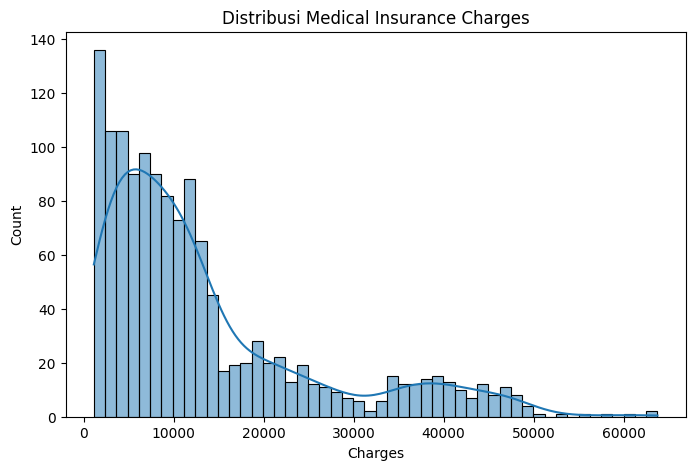

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribusi Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

df['charges'].describe()

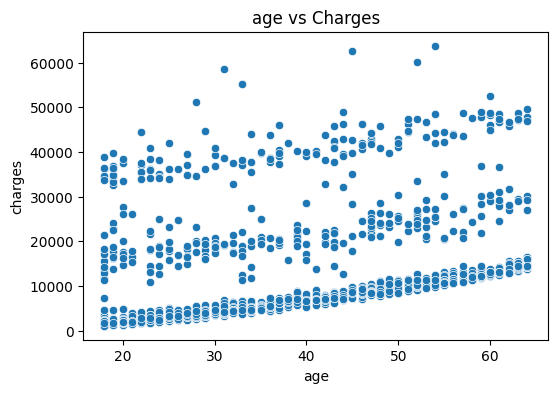

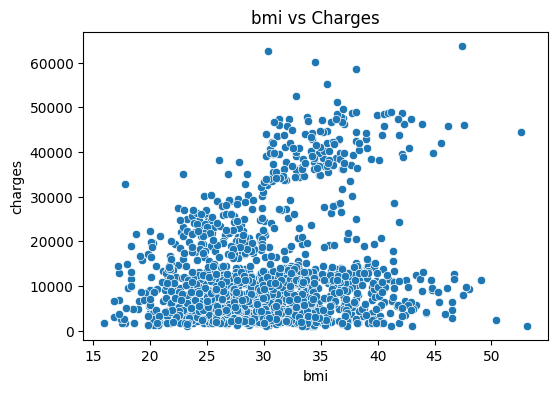

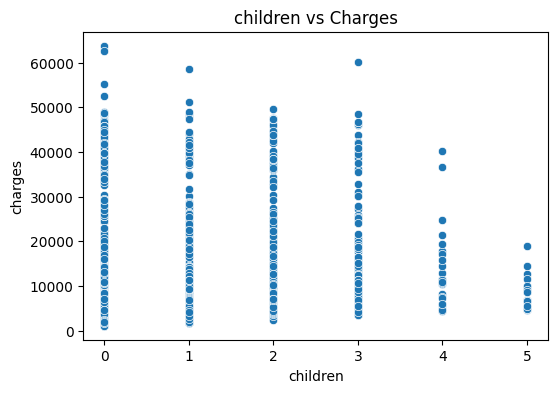

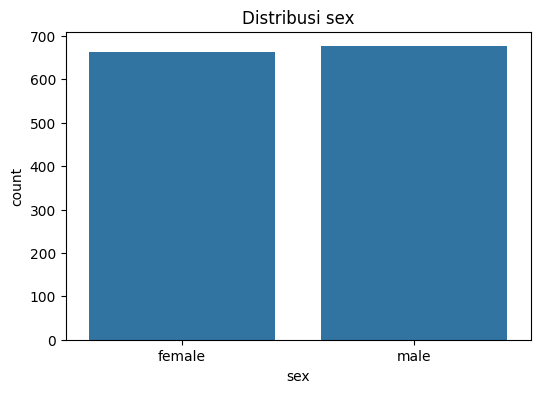

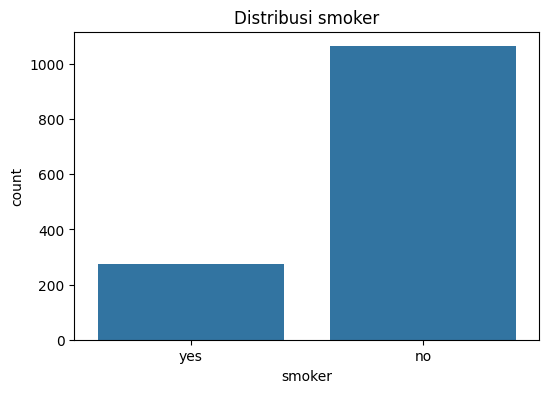

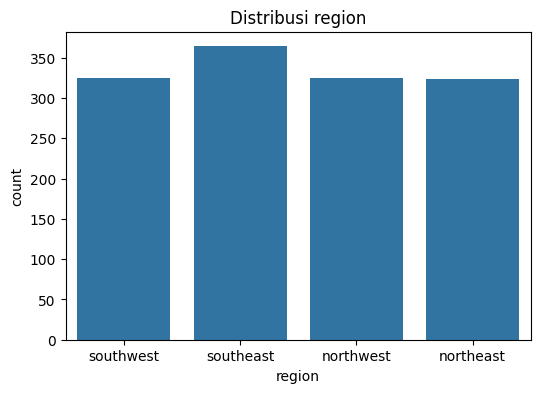

In [6]:
numerical_cols = ['age', 'bmi', 'children']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['charges'])
    plt.title(f'{col} vs Charges')
    plt.show()


categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f'Distribusi {col}')
    plt.show()


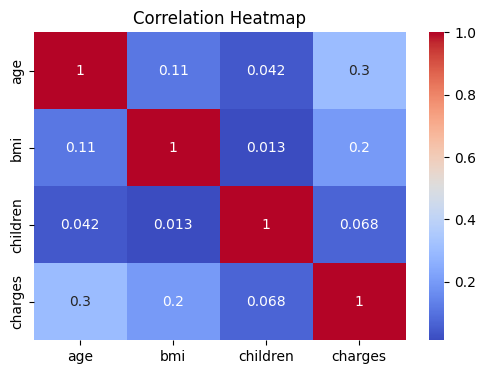

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning n Feature Engineering

encoder

In [8]:
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0})

# region : one-hot encoding
df = pd.get_dummies(df, columns=['region'], drop_first=True)

kategori bmi,
Berdasarkan WHO classification:
- BMI < 25 → Normal / sehat
- BMI 25–29.9 → Overweight / kelebihan berat badan
- BMI ≥ 30 → Obese / obesitas

In [9]:
def bmi_category(bmi):
    if bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['bmi'].apply(bmi_category)

kategori usia,
- Usia <30 : umumnya biaya kesehatan rendah.
- Usia 30–49 : risiko mulai naik.
- Usia ≥50 : risiko tinggi

In [10]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

df['Age_group'] = df['age'].apply(age_group)


Risk Score
- smoker pengaruh tinggi : dikalikan 2
- childrenn karena minor: dibagi 2

mengelompokkan pelanggan mana yang risiko biaya kesehatannya tinggi

In [11]:
def risk_score(row):
    age_point = {'Young':1, 'Adult':2, 'Senior':3}[row['Age_group']]
    bmi_point = {'Normal':1, 'Overweight':2, 'Obese':3}[row['BMI_category']]
    smoker_point = row['smoker'] * 2
    children_point = row['children'] / 2
    return age_point + bmi_point + smoker_point + children_point

df['risk_score'] = df.apply(risk_score, axis=1)


## EDA

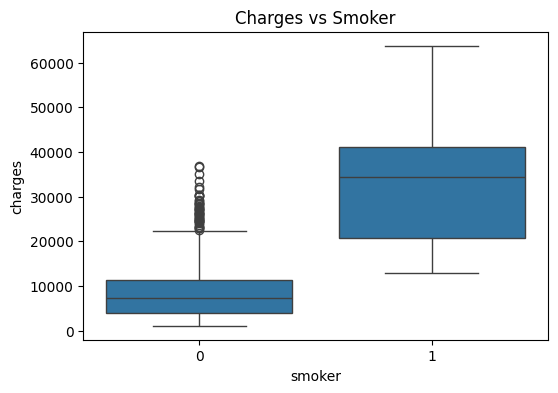

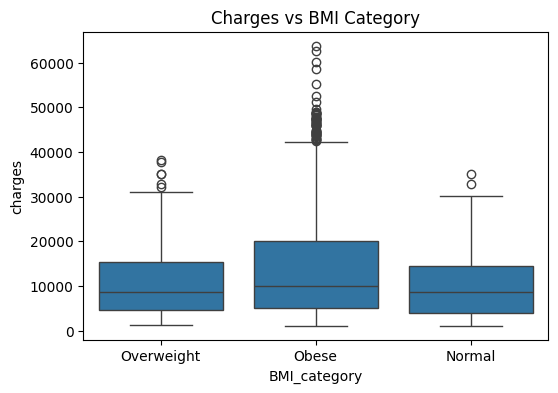

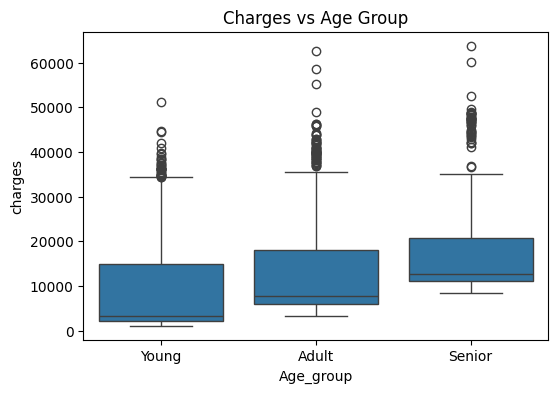

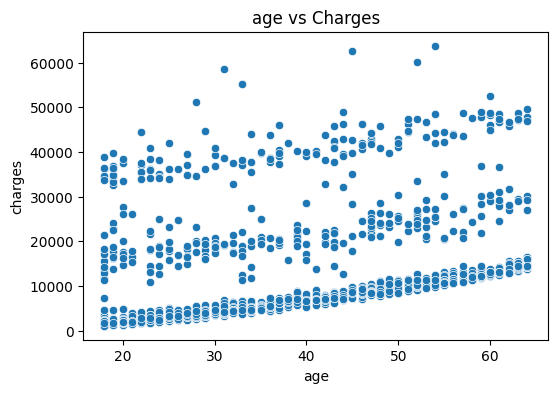

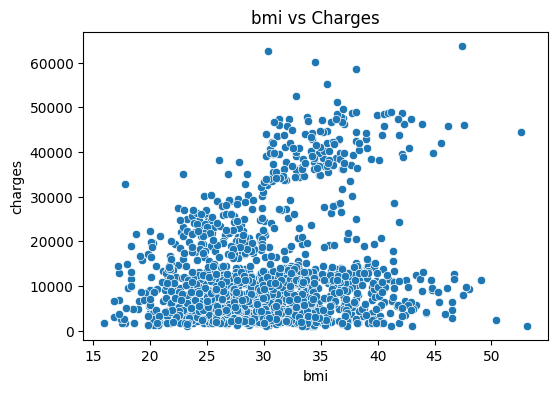

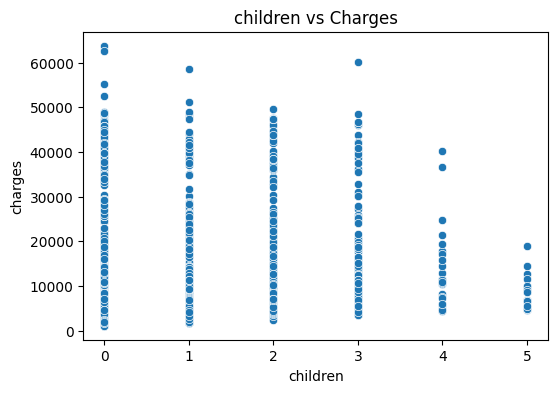

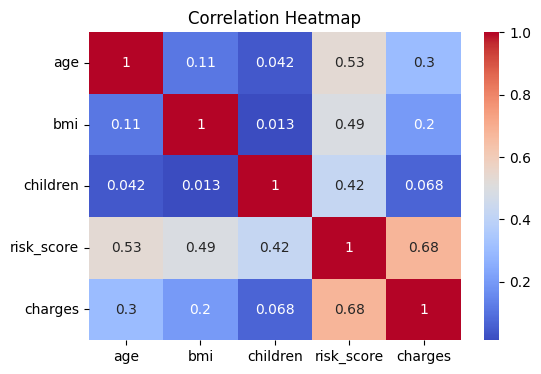

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot categorical vs charges
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges vs Smoker')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='BMI_category', y='charges', data=df)
plt.title('Charges vs BMI Category')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Age_group', y='charges', data=df)
plt.title('Charges vs Age Group')
plt.show()

# Scatterplot numeric vs charges
num_col = ['age', 'bmi', 'risk_score']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['charges'])
    plt.title(f'{col} vs Charges')
    plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[['age','bmi','children','risk_score','charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



age              Axes(0.125,0.653529;0.168478x0.226471)
sex           Axes(0.327174,0.653529;0.168478x0.226471)
bmi           Axes(0.529348,0.653529;0.168478x0.226471)
children      Axes(0.731522,0.653529;0.168478x0.226471)
smoker           Axes(0.125,0.381765;0.168478x0.226471)
charges       Axes(0.327174,0.381765;0.168478x0.226471)
risk_score    Axes(0.529348,0.381765;0.168478x0.226471)
dtype: object

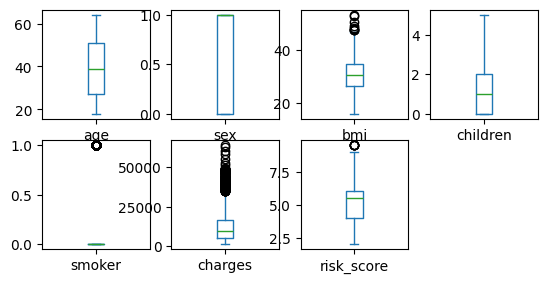

In [13]:
df.plot(kind="box", subplots=True, layout=(3,4))

Beberapa variabel seperti charges, BMI, dan risk_score memiliki banyak outlier secara statistik.
Namun dalam konteks domain health insurance, nilai-nilai ini expected karena individu dengan BMI tinggi atau perokok memang memiliki biaya kesehatan ekstrem.
Oleh karena itu, outlier tidak dihapus pada cara pertama. Pada Fase 2, outlier diolah menggunakan Winsorizing untuk perbandingan kinerja model.

Risk Score

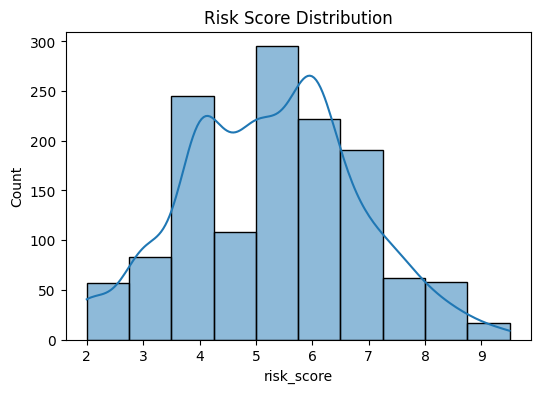

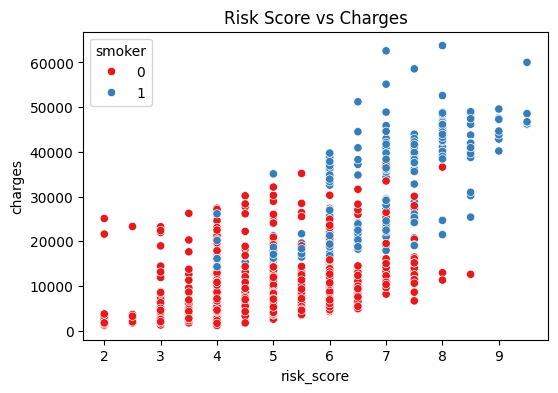

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['risk_score'], bins=10, kde=True)
plt.title('Risk Score Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='risk_score', y='charges', hue='smoker', data=df, palette='Set1')
plt.title('Risk Score vs Charges')
plt.show()


- Skor >7 maka high-risk maka biaya tinggi

## SPlit Train n Test dan Modelling
prediksi charges dengan tanpa penanganan outlier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = df[['age','bmi','children','sex','smoker','region_northwest','region_southeast','region_southwest','risk_score']]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression
: simple, interpretable

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error,r2_score

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))


Linear Regression:
RMSE: 5802.268488163058
MAE: 4286.857096324171
R²: 0.783145927923321


Random Forest : robust terhadap outlier

In [18]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
RMSE: 4571.00308842046
MAE: 2551.1376381798823
R²: 0.865415523633721


Jika dibandingkan keduanya random forest terlihat lebih unggul, dengan rmse lebih kecil dan r2 lebih mendekati 1

Feature Importance :  melihat fitur yang paling berpengaruh ke target

In [19]:
# Feature importance Random Forest
importances = rf.feature_importances_
features = X.columns
feat_imp = pd.DataFrame({'Feature':features, 'Importance':importances}).sort_values(by='Importance', ascending=False)
feat_imp

,Feature,Importance
4,smoker,0.608618
1,bmi,0.209351
0,age,0.130935
8,risk_score,0.018505
2,children,0.013029
3,sex,0.005917
6,region_southeast,0.004974
5,region_northwest,0.004599
7,region_southwest,0.004071


# Handling Outlier
- Kita menangani outlier secara statistik menggunakan Winsorizing, yaitu membatasi nilai-nilai ekstrem pada persentil tertentu (misalnya 5% dan 95%) tanpa menghapus data.
- Tujuannya untuk membandingkan apakah model menjadi lebih stabil ketika ekstrem value dikendalikan.

In [20]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',   # Menggunakan IQR method
    tail='both',            # Tangani upper dan lower tail
    fold=1.5                # IQR multiplier
)

out_cols = ['bmi', 'risk_score', 'charges']

df_winsor = df.copy()
df_winsor[out_cols] = winsor.fit_transform(df[out_cols])

In [29]:
print("Sebelum Winsorizing (charges) :\n")
print(df['charges'].describe())

print("\nSesudah Winsorizing (charges) :\n")
print(df_winsor['charges'].describe())

Sebelum Winsorizing (charges) :

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Sesudah Winsorizing (charges) :

count     1338.000000
mean     12479.369251
std      10158.056096
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      34489.350562
Name: charges, dtype: float64


bmi              Axes(0.125,0.653529;0.168478x0.226471)
risk_score    Axes(0.327174,0.653529;0.168478x0.226471)
charges       Axes(0.529348,0.653529;0.168478x0.226471)
dtype: object

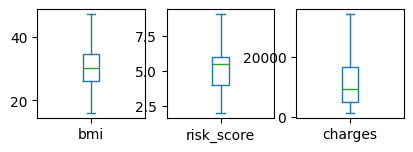

In [22]:
df_winsor[out_cols].plot(kind="box", subplots=True, layout=(3,4))

## EDA 
setelah ditangani outlier

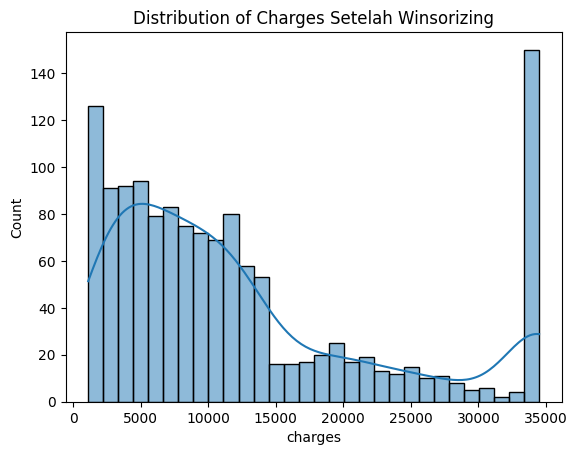

In [23]:
sns.histplot(df_winsor['charges'], bins=30, kde=True)
plt.title('Distribution of Charges Setelah Winsorizing')
plt.show()


encoder

In [24]:
df_winsor_encoded = pd.get_dummies(df_winsor, drop_first=True)

## Modelling
setelah outlier

In [25]:
X = df_winsor_encoded.drop("charges", axis=1)
y = df_winsor_encoded["charges"]

from sklearn.model_selection import train_test_split
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model
lr_w = LinearRegression()
rf_w = RandomForestRegressor(random_state=42, n_estimators=300)

# Train
lr_w.fit(X_train_w, y_train_w)
rf_w.fit(X_train_w, y_train_w)

# Predict
y_pred_lr_w = lr_w.predict(X_test_w)
y_pred_rf_w = rf_w.predict(X_test_w)


In [30]:
print("Evaluasi Model (Winsorizing)")

print("\nLinear Regression:")
print("RMSE:", root_mean_squared_error(y_test_w, y_pred_lr_w))
print("MAE:", mean_absolute_error(y_test_w, y_pred_lr_w))
print("R²:", r2_score(y_test_w, y_pred_lr_w))

print("\nRandom Forest:")
print("RMSE:", root_mean_squared_error(y_test_w, y_pred_rf_w))
print("MAE:", mean_absolute_error(y_test_w, y_pred_rf_w))
print("R²:", r2_score(y_test_w, y_pred_rf_w))

# Feature Importance
importances_w = rf_w.feature_importances_
feat_imp_w = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances_w
}).sort_values(by='Importance', ascending=False)

feat_imp_w


Evaluasi Model (Winsorizing)

Linear Regression:
RMSE: 4751.094878812569
MAE: 3268.5992462267373
R²: 0.7920631255236819

Random Forest:
RMSE: 4330.306530445098
MAE: 2279.898885214318
R²: 0.8272645860763485


,Feature,Importance
4,smoker,0.607957
0,age,0.159296
2,bmi,0.141053
8,risk_score,0.022628
9,BMI_category_Obese,0.020382
3,children,0.016461
1,sex,0.007929
5,region_northwest,0.006817
6,region_southeast,0.006699
7,region_southwest,0.005457


In [43]:
feature_names = X_train_w.columns
feature_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest', 'risk_score',
       'BMI_category_Obese', 'BMI_category_Overweight', 'Age_group_Senior',
       'Age_group_Young'],
      dtype='object')

## Perbadingan kedua cara

Distribusi Charges


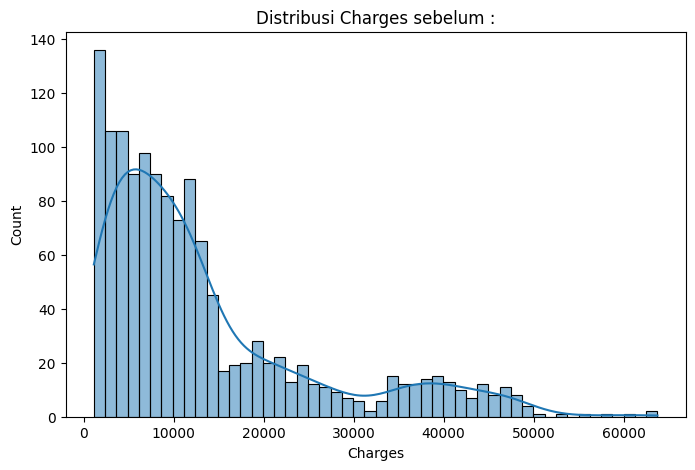

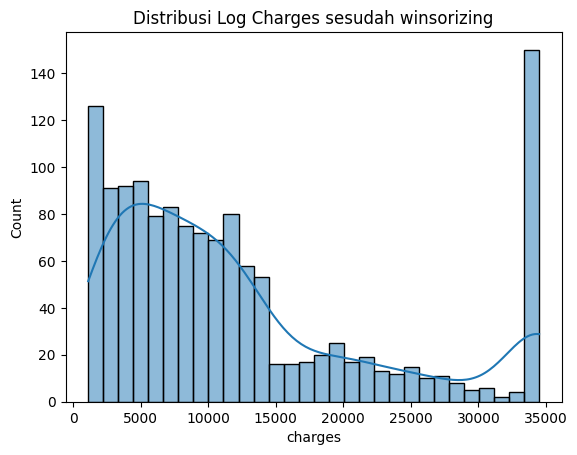

In [31]:
print("Distribusi Charges")

plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribusi Charges sebelum :')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

sns.histplot(df_winsor['charges'], bins=30, kde=True)
plt.title('Distribusi Log Charges sesudah winsorizing')
plt.show()

In [35]:
print("Evaluasi Model")

print("\nLinear Regression:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_w, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

# # Feature Importance
# importances = rf.feature_importances_
# feat_imp = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

print(feat_imp)


print("\nEvaluasi Model (Winsorizing)")

print("\nLinear Regression:")
print("RMSE:", root_mean_squared_error(y_test_w, y_pred_lr_w))
print("MAE:", mean_absolute_error(y_test_w, y_pred_lr_w))
print("R²:", r2_score(y_test_w, y_pred_lr_w))

print("\nRandom Forest:")
print("RMSE:", root_mean_squared_error(y_test_w, y_pred_rf_w))
print("MAE:", mean_absolute_error(y_test_w, y_pred_rf_w))
print("R²:", r2_score(y_test_w, y_pred_rf_w))

# Feature Importance
# importances_w = rf_w.feature_importances_
# feat_imp_w = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': importances_w
# }).sort_values(by='Importance', ascending=False)
print(feat_imp_w)


Evaluasi Model

Linear Regression:
RMSE: 5802.268488163058
MAE: 4286.857096324171
R²: 0.783145927923321

Random Forest:
RMSE: 4571.00308842046
MAE: 3163.7739306261515
R²: 0.865415523633721
            Feature  Importance
4            smoker    0.608618
1               bmi    0.209351
0               age    0.130935
8        risk_score    0.018505
2          children    0.013029
3               sex    0.005917
6  region_southeast    0.004974
5  region_northwest    0.004599
7  region_southwest    0.004071

Evaluasi Model (Winsorizing)

Linear Regression:
RMSE: 4751.094878812569
MAE: 3268.5992462267373
R²: 0.7920631255236819

Random Forest:
RMSE: 4330.306530445098
MAE: 2279.898885214318
R²: 0.8272645860763485
                    Feature  Importance
4                    smoker    0.607957
0                       age    0.159296
2                       bmi    0.141053
8                risk_score    0.022628
9        BMI_category_Obese    0.020382
3                  children    0.016461
1   

- Winsorizing membantu model menjadi lebih stabil dan menurunkan error terutama untuk Linear Regression dan MAE di Random Forest.
Namun, sedikit penurunan R² pada Random Forest menunjukkan model kehilangan sebagian informasi dari outlier besar.
- Smoker tetap faktor paling berpengaruh, beberapa fitur kategori baru seperti BMI_category & Age_group mulai sedikit berkontribusi.

# Scenario Analysis
prediksi charges based on skenario

In [36]:
def predict_scenario(model, df_scenario, scaler=None):
    
    df_encoded = pd.get_dummies(df_scenario)
    df_encoded = df_encoded.reindex(columns=X_train.columns, fill_value=0)

    pred = model.predict(df_encoded)
    
    df_scenario['Predicted_Charges'] = pred
    return df_scenario

- Scenario : Smoker vs Non-Smoker, 
Melihat dampak langsung merokok terhadap biaya medis

In [38]:
scenario1 = pd.DataFrame([
    {'age': 40, 'bmi': 28, 'children': 2, 'smoker': 0, 'sex': 1, 'risk_score': 50, 
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},
    {'age': 40, 'bmi': 28, 'children': 2, 'smoker': 1, 'sex': 1, 'risk_score': 50, 
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0}
])

result_scenario1 = predict_scenario(rf, scenario1)
print("Scenario 1: Smoker vs Non-Smoker")
result_scenario1

Scenario 1: Smoker vs Non-Smoker


,age,bmi,children,smoker,sex,risk_score,region_northwest,region_southeast,region_southwest,Predicted_Charges
0,40,28,2,0,1,50,0,0,0,9013.055385
1,40,28,2,1,1,50,0,0,0,22502.350287


#### Kolom lainnya sama, yang beda adalah smokernya. Ketika seseorang merokok, biaya medisnya melonjak dari ±9 ribu menjadi ±22 ribu.

- Scenario : BMI Simulation, melihat efek penurunan berat badan terhadap charges.

In [39]:
scenario2 = pd.DataFrame([
    {'age': 35, 'bmi': 35, 'children': 1, 'smoker': 0, 'sex': 1, 'risk_score': 40,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},
    
    {'age': 35, 'bmi': 30, 'children': 1, 'smoker': 0, 'sex': 1, 'risk_score': 40,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},
    
    {'age': 35, 'bmi': 25, 'children': 1, 'smoker': 0, 'sex': 1, 'risk_score': 40,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0}
])

result_scenario2 = predict_scenario(rf, scenario2)
print("Scenario 2: BMI Drop (Obese → Normal)")
result_scenario2


Scenario 2: BMI Drop (Obese → Normal)


,age,bmi,children,smoker,sex,risk_score,region_northwest,region_southeast,region_southwest,Predicted_Charges
0,35,35,1,0,1,40,0,0,0,7133.116913
1,35,30,1,0,1,40,0,0,0,7105.514351
2,35,25,1,0,1,40,0,0,0,7674.948482


#### Seharusnya bmi turun diikuti charge turun, jadi BMI berpengaruh, tapi tidak sekuat faktor lain seperti smoker & age.


- Scenario : Age Scenario (Young → Adult → Senior), 
melihat bagaimana usia mempengaruhi biaya medis.

In [40]:
scenario3 = pd.DataFrame([
    {'age': 25, 'bmi': 27, 'children': 0, 'smoker': 0, 'sex': 1, 'risk_score': 35,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},
    
    {'age': 45, 'bmi': 27, 'children': 0, 'smoker': 0, 'sex': 1, 'risk_score': 35,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},

    {'age': 60, 'bmi': 27, 'children': 0, 'smoker': 0, 'sex': 1, 'risk_score': 35,
     'region_northwest':0, 'region_southeast':0, 'region_southwest':0},
])

result_scenario3 = predict_scenario(rf, scenario3)
print(" Scenario 3: Age Impact ")
result_scenario3


 Scenario 3: Age Impact 


,age,bmi,children,smoker,sex,risk_score,region_northwest,region_southeast,region_southwest,Predicted_Charges
0,25,27,0,0,1,35,0,0,0,4320.438524
1,45,27,0,0,1,35,0,0,0,12961.480172
2,60,27,0,0,1,35,0,0,0,23226.337161


#### Dengan semua faktor lain tetap sama, semakin usia naik, biaya medis naik sangat signifikan.

### What - If

In [44]:
feature_list = [
    'age', 'sex', 'bmi', 'children', 'smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'risk_score',
    'BMI_category_Obese', 'BMI_category_Overweight',
    'Age_group_Senior', 'Age_group_Young'
]


- BMI Naik/Turun apa Pengaruh ke Biaya
,mengetahui seberapa sensitif biaya terhadap kenaikan BMI.

In [45]:
bmi_range = np.arange(18, 40, 1)

whatif_bmi = pd.DataFrame({
    "age": 40,
    "sex": 1,
    "bmi": bmi_range,
    "children": 2,
    "smoker": 0,
    "risk_score": 50,
    "region_northwest": 0,
    "region_southeast": 0,
    "region_southwest": 0,
})

#BMI Category
whatif_bmi["BMI_category_Obese"] = (whatif_bmi["bmi"] >= 30).astype(int)
whatif_bmi["BMI_category_Overweight"] = ((whatif_bmi["bmi"] >= 25) & (whatif_bmi["bmi"] < 30)).astype(int)

#Age Group
whatif_bmi["Age_group_Senior"] = (whatif_bmi["age"] >= 55).astype(int)
whatif_bmi["Age_group_Young"] = (whatif_bmi["age"] <= 30).astype(int)

# Reorder biar sesuai model
whatif_bmi = whatif_bmi[feature_list]

# Prediksi
whatif_bmi["Predicted_Charges"] = rf_w.predict(whatif_bmi)
whatif_bmi.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,risk_score,BMI_category_Obese,BMI_category_Overweight,Age_group_Senior,Age_group_Young,Predicted_Charges
0,40,1,18,2,0,0,0,0,50,0,0,0,0,8718.571012
1,40,1,19,2,0,0,0,0,50,0,0,0,0,8777.970300
2,40,1,20,2,0,0,0,0,50,0,0,0,0,8865.308058
3,40,1,21,2,0,0,0,0,50,0,0,0,0,9054.134796
4,40,1,22,2,0,0,0,0,50,0,0,0,0,9321.588291


#### BMI makin tinggi = biaya makin naik
- Dari 18 → 22, biaya naik dari 8.7K → 9.3K.
- Makin tinggi BMI → makin tinggi potensi obesitas → makin tinggi potensi penyakit → premi/biaya makin mahal.

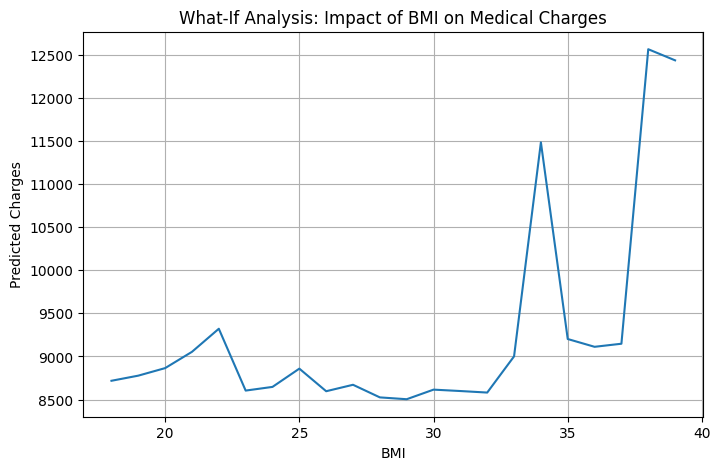

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(whatif_bmi["bmi"], whatif_bmi["Predicted_Charges"])
plt.xlabel("BMI")
plt.ylabel("Predicted Charges")
plt.title("What-If Analysis: Impact of BMI on Medical Charges")
plt.grid(True)
plt.show()


In [46]:
# WHAT-IF 2 : Smoker vs Non-Smoker

whatif_smoker = pd.DataFrame([
    {
        "age": 40,
        "sex": 1,
        "bmi": 28,
        "children": 2,
        "smoker": 0,   # non-smoker
        "region_northwest": 0,
        "region_southeast": 0,
        "region_southwest": 0,
        "risk_score": 50,
        "BMI_category_Obese": 0,
        "BMI_category_Overweight": 0,
        "Age_group_Senior": 0,
        "Age_group_Young": 0
    },
    {
        "age": 40,
        "sex": 1,
        "bmi": 28,
        "children": 2,
        "smoker": 1,   # smoker
        "region_northwest": 0,
        "region_southeast": 0,
        "region_southwest": 0,
        "risk_score": 50,
        "BMI_category_Obese": 0,
        "BMI_category_Overweight": 0,
        "Age_group_Senior": 0,
        "Age_group_Young": 0
    }
])

whatif_smoker["Predicted_Charges"] = rf_w.predict(whatif_smoker)
whatif_smoker


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest,risk_score,BMI_category_Obese,BMI_category_Overweight,Age_group_Senior,Age_group_Young,Predicted_Charges
0,40,1,28,2,0,0,0,0,50,0,0,0,0,8604.918422
1,40,1,28,2,1,0,0,0,50,0,0,0,0,22351.350942


Ketika seseorang merokok, biaya medisnya melonjak dari ±9 ribu menjadi ±22 ribu.

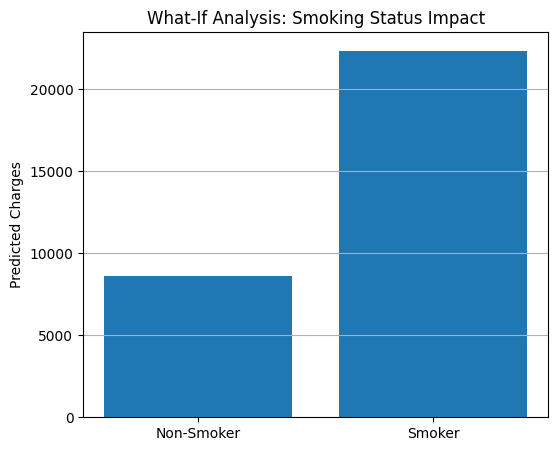

In [48]:
# GRAFIK WHAT-IF 2: Smoker vs Non-Smoker
plt.figure(figsize=(6,5))
plt.bar(whatif_smoker["smoker"], whatif_smoker["Predicted_Charges"])
plt.xticks([0,1], ["Non-Smoker", "Smoker"])
plt.ylabel("Predicted Charges")
plt.title("What-If Analysis: Smoking Status Impact")
plt.grid(axis='y')
plt.show()


# Summary
Model prediksi biaya medis dibangun menggunakan regresi linear dan Random Forest.
Setelah perbaikan data (winsorizing dan feature engineering), model terbaik adalah Random Forest Winsorized, karena memberikan akurasi prediksi lebih stabil dan paling rendah error.

Model ini digunakan untuk:
- Risk Scoring → mengukur potensi risiko biaya medis individu
- Pricing Simulation → memprediksi biaya berdasarkan profil pelanggan
- Scenario Analysis → evaluasi dampak perubahan faktor tertentu
- What-If Analysis → mencari titik sensitif yang mempengaruhi biaya paling besar

## Business Conclusion
- Smoker dan BMI adalah pendorong biaya kesehatan terbesar.
- Usia meningkatkan biaya secara tajam, terutama setelah 50 tahun.
- Risk score bermanfaat sebagai indikator risiko umum.
- Winsorizing sangat meningkatkan performa model → penting dalam data real.
- Analisis skenario dan what-if membantu memahami dampak perubahan perilaku/risiko.